# nvImageCodec examples

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

Setting resource folder

In [2]:
resources_dir = os.getenv("PYNVIMGCODEC_EXAMPLES_RESOURCES_DIR", "../assets/images/")

Import nvImageCodec module and create Decoder and Encoder

In [3]:
from nvidia import nvimgcodec
decoder = nvimgcodec.Decoder()
encoder = nvimgcodec.Encoder()

Load and decode Jpeg image with nvImageCodec

In [4]:
with open(resources_dir + "tabby_tiger_cat.jpg", 'rb') as in_file:
    data = in_file.read()
    nv_img_cat = decoder.decode(data)

Save image to bmp file with nvImageCodec

In [5]:
with open("cat-jpg-o.bmp", 'wb') as out_file:
    data = encoder.encode(nv_img_cat, "bmp")
    out_file.write(data)

Read back with OpenCV just saved (with nvImageCodec) bmp image 

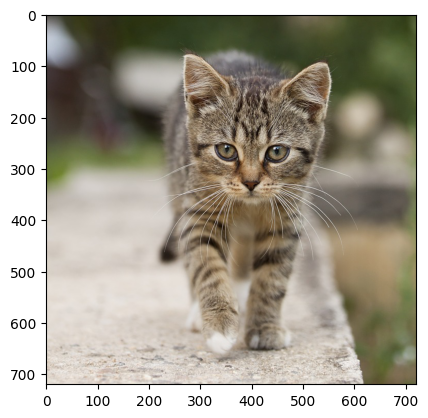

In [6]:
cv_img_bmp = cv2.imread("cat-jpg-o.bmp")
cv_img_bmp = cv2.cvtColor(cv_img_bmp, cv2.COLOR_BGR2RGB)
plt.imshow(cv_img_bmp)

Load and decode Jpeg2000 (in jp2 container) image with nvImageCodec in one read function

In [7]:
nv_img = decoder.read(resources_dir + "cat-1046544_640.jp2")

Save image to jpg file with nvImageCodec in one write function

In [8]:
encoder.write("cat-jp2-o.jpg", nv_img)

'cat-jp2-o.jpg'

Read back with OpenCV just save (with nvImageCodec) bmp image 

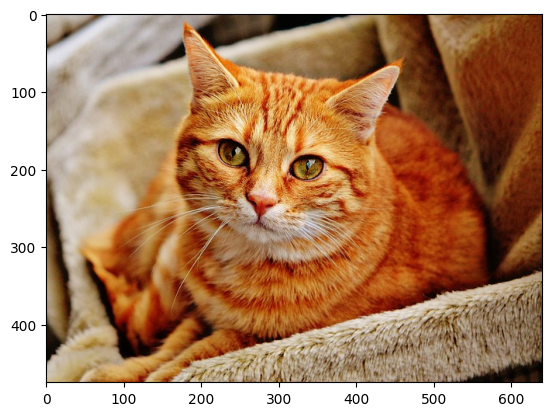

In [9]:
image = cv2.imread("cat-jp2-o.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Load jpg with nvImageCodec

In [10]:
nv_img_jpg = decoder.read(resources_dir + "tabby_tiger_cat.jpg")

Save as Jpeg 2000 with nvImageCodec

In [11]:
encoder.write("cat-jpg-o.j2k", nv_img_jpg)

'cat-jpg-o.j2k'

Read back with OpenCV just saved (with nvImageCodec) j2k image 

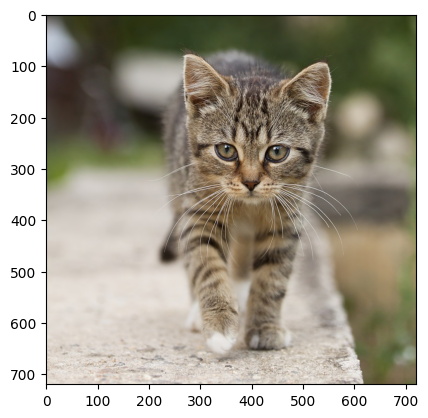

In [12]:
image = cv2.imread("cat-jpg-o.j2k")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Passing decoding parameters

Decode jpeg with Exif orientation - by default it applies exif orientation

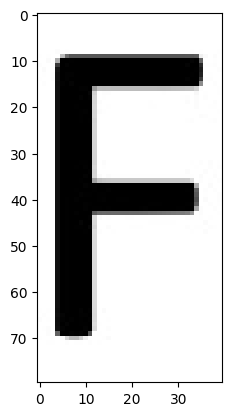

In [13]:
nv_img_jpg = decoder.read(resources_dir+ "f-exif-8.jpg")
encoder.write("f-exif-8.bmp", nv_img_jpg)
image = cv2.imread("f-exif-8.bmp")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Let assume we would like to ignore exif orientation

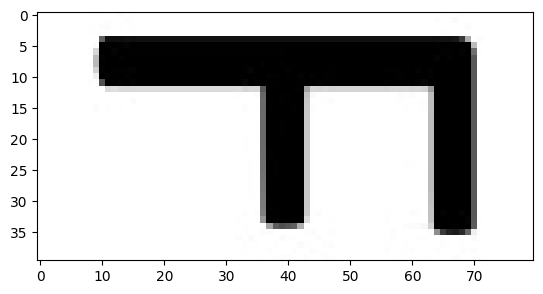

In [14]:
dec_params = nvimgcodec.DecodeParams(apply_exif_orientation=False)
nv_img_jpg = decoder.read(resources_dir + "f-exif-8.jpg", dec_params)
encoder.write("f-wo-exif.bmp", nv_img_jpg)
image = cv2.imread("f-wo-exif.bmp")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Passing encoding parameters

Changing quality and chroma subsampling in jpeg

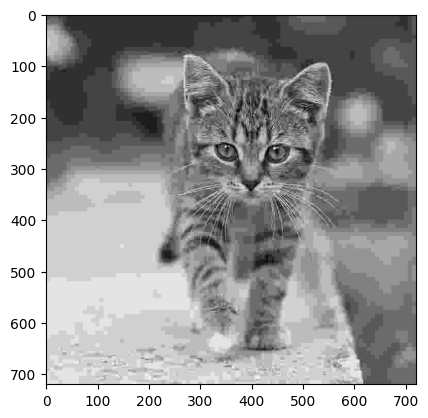

In [15]:
nv_img_jpg = decoder.read(resources_dir + "tabby_tiger_cat.jpg")
enc_params = nvimgcodec.EncodeParams(quality_type=nvimgcodec.QualityType.QUALITY, quality_value=5, chroma_subsampling=nvimgcodec.ChromaSubsampling.CSS_GRAY)
encoder.write("cat-q5-gray.jpg", nv_img_jpg, params=enc_params)
                    
image = cv2.imread("cat-q5-gray.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Jpeg optimized huffman and progressive encoding

default huffman file size: 69265
optimized huffman file size: 65984


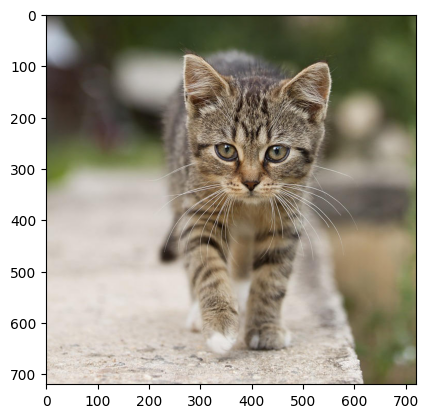

In [16]:
nv_img_jpg = decoder.read(resources_dir + "tabby_tiger_cat.jpg")
encoder.write("cat-q75.jpg", nv_img_jpg, params=nvimgcodec.EncodeParams(quality_type=nvimgcodec.QualityType.QUALITY, quality_value=75))
encoder.write("cat-q75-optimized_huffman.jpg", nv_img_jpg, params=nvimgcodec.EncodeParams(
    quality_type=nvimgcodec.QualityType.QUALITY,
    quality_value=75,
    jpeg_encode_params = nvimgcodec.JpegEncodeParams(optimized_huffman=True, progressive=True)
))

print("default huffman file size:", os.path.getsize("cat-q75.jpg"))
print("optimized huffman file size:", os.path.getsize(
    "cat-q75-optimized_huffman.jpg"))

image = cv2.imread("cat-q75-optimized_huffman.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


jpeg2000 encode options overview

lossy file size: 2457
lossless file size: 598265
lossless 2 decomposition levels file size: 670866
lossless 2 decomposition levels with High-Throughput file size: 845229


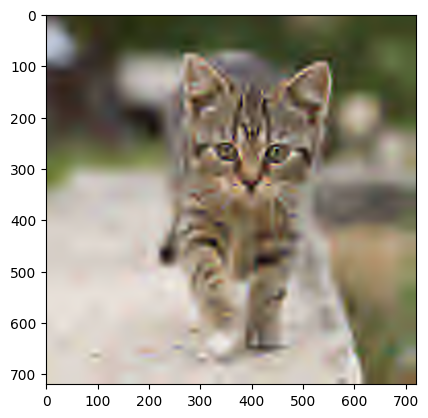

In [17]:
import ctypes
nv_img_jpg = decoder.read(resources_dir + "tabby_tiger_cat.jpg")

encoder.write("cat-psnr25.j2k", nv_img_jpg, params=nvimgcodec.EncodeParams(quality_type=nvimgcodec.QualityType.PSNR, quality_value=25))

encoder.write("cat-lossless.j2k", nv_img_jpg, params=nvimgcodec.EncodeParams(quality_type=nvimgcodec.QualityType.LOSSLESS))

jpeg2k_encode_params = nvimgcodec.Jpeg2kEncodeParams()
jpeg2k_encode_params.num_resolutions = 2
jpeg2k_encode_params.code_block_size = (32, 32)
jpeg2k_encode_params.bitstream_type = nvimgcodec.Jpeg2kBitstreamType.JP2
jpeg2k_encode_params.prog_order = nvimgcodec.Jpeg2kProgOrder.LRCP
encoder.write("cat-lossless-2decomps.j2k",
              nv_img_jpg,
              params=nvimgcodec.EncodeParams(
                  quality_type=nvimgcodec.QualityType.LOSSLESS,
                  jpeg2k_encode_params=jpeg2k_encode_params
                  )
                  )

jpeg2k_encode_params.ht = True
encoder.write("cat-lossless-2decomps-ht.j2k", nv_img_jpg, params=nvimgcodec.EncodeParams(
    quality_type=nvimgcodec.QualityType.LOSSLESS,
    jpeg2k_encode_params=jpeg2k_encode_params
))

print("lossy file size:", os.path.getsize("cat-psnr25.j2k"))
print("lossless file size:", os.path.getsize("cat-lossless.j2k"))
print("lossless 2 decomposition levels file size:",  os.path.getsize("cat-lossless-2decomps.j2k"))
print("lossless 2 decomposition levels with High-Throughput file size:",  os.path.getsize("cat-lossless-2decomps-ht.j2k"))
image = cv2.imread("cat-psnr25.j2k")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

We can specify allowed backends used for decoding

In [18]:
gpu_dec = nvimgcodec.Decoder(backends=[nvimgcodec.Backend(nvimgcodec.GPU_ONLY, load_hint=0.5), nvimgcodec.Backend(nvimgcodec.HYBRID_CPU_GPU)])
cpu_dec = nvimgcodec.Decoder(backend_kinds=[nvimgcodec.CPU_ONLY])

In [19]:
%%time
nv_img_j2k = cpu_dec.read(resources_dir + "cat-1046544_640.jp2")

CPU times: user 80.6 ms, sys: 259 μs, total: 80.9 ms
Wall time: 79.9 ms


In [20]:
%%time
nv_img_j2k = gpu_dec.read(resources_dir + "cat-1046544_640.jp2")


CPU times: user 944 μs, sys: 3.67 ms, total: 4.61 ms
Wall time: 4.21 ms


The same way we can create Encoder with allowed backends.

In [21]:
gpu_enc = nvimgcodec.Encoder(backends=[nvimgcodec.Backend(nvimgcodec.GPU_ONLY, load_hint=0.5)
                             , nvimgcodec.Backend(nvimgcodec.HYBRID_CPU_GPU)])
cpu_enc = nvimgcodec.Encoder(backend_kinds=[nvimgcodec.CPU_ONLY])

In [22]:
cpu_enc.write("cat_cpu_out.jpg", nv_img_j2k)

'cat_cpu_out.jpg'

In [23]:
gpu_enc.write("cat_gpu_out.jpg", nv_img_j2k)

'cat_gpu_out.jpg'

### Support of \_\_cuda_array_interface\_\_

In [24]:
print(nv_img_j2k.__cuda_array_interface__)
print(nv_img_j2k.shape)

{'shape': (475, 640, 3), 'strides': None, 'typestr': '|u1', 'data': (42954608640, False), 'version': 3, 'stream': 1}
(475, 640, 3)


### Support of \_\_array_interface\_\_

It is possible to pass to nvImageCodec host ndarray by object which supports \_\_array_interface\_\_ as for example image (numpy.ndarray) created by OpenCV 

<class 'numpy.ndarray'>
{'data': (93831965561808, False), 'strides': None, 'descr': [('', '|u1')], 'typestr': '|u1', 'shape': (720, 720, 3), 'version': 3}


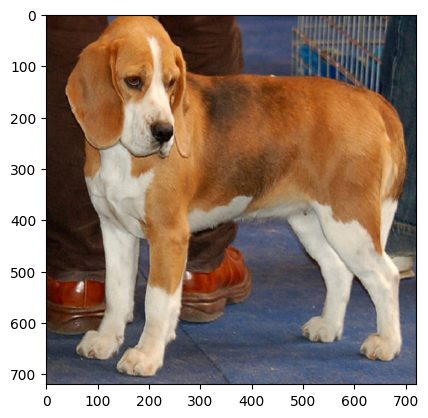

In [25]:
cv_img = cv2.imread(resources_dir + "Weimaraner.bmp")
cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)

print(type(cv_img))
print(cv_img.__array_interface__)

nv_h_img = nvimgcodec.as_image(cv_img)
gpu_enc.write("Weimaraner_ai_out.jpg", nv_h_img)

image = cv2.imread("Weimaraner_ai_out.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


If we use cpu() method of Image object it would create new Image with copied content to host buffer.

In [26]:
nv_img = cpu_dec.read(resources_dir + "cat-1046544_640.jp2")
nv_h_img = nv_img.cpu()

Image with host buffer supports \_\_array_interface\_\_  (but can't return a proper \_\_cuda_array_interface\_\_)

In [27]:
print(nv_h_img.__array_interface__)
print(nv_h_img.__cuda_array_interface__)

{'shape': (475, 640, 3), 'strides': None, 'typestr': '|u1', 'data': (8680112128, False), 'version': 3}
{'shape': (475, 640, 3), 'strides': None, 'typestr': '|u1', 'data': (8680112128, False), 'version': 3, 'stream': 1}


so we can pass such Image to functions which accept and can use this interface like imshow from matplotlib library

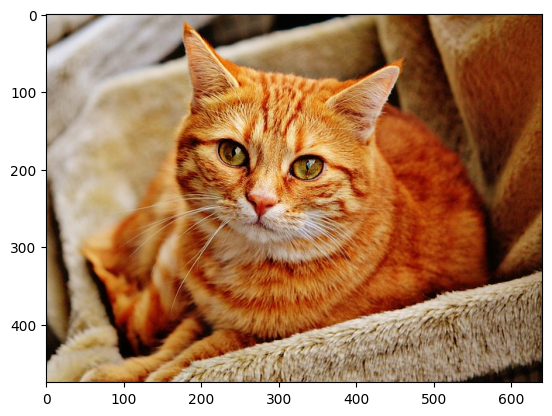

In [28]:
plt.imshow(nv_h_img)

We can also create a zero-copy view of this image with numpy and process it with OpenCV

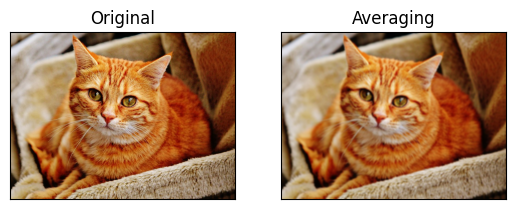

In [29]:
np_img = np.asarray(nv_h_img)
kernel = np.ones((5, 5), np.float32)/25
dst = cv2.filter2D(np_img, -1, kernel)
plt.subplot(121), plt.imshow(np_img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dst), plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()


There is also method cuda() which can be used to convert an Image with a host buffer to an Image with copied contents to a device buffer.

In [30]:
print(nv_h_img.__cuda_array_interface__)
nv_new_cuda_img = nv_h_img.cuda()
print(nv_new_cuda_img.__cuda_array_interface__)


{'shape': (475, 640, 3), 'strides': None, 'typestr': '|u1', 'data': (8680112128, False), 'version': 3, 'stream': 1}
{'shape': (475, 640, 3), 'strides': None, 'typestr': '|u1', 'data': (42951228416, False), 'version': 3, 'stream': 1}


We can check whether Image keeps a host or a device buffer by reading the buffer_kind property

In [31]:
print("Host image buffer kind: ", nv_h_img.buffer_kind)
print("Device image buffer kind: ", nv_new_cuda_img.buffer_kind)

Host image buffer kind:  ImageBufferKind.STRIDED_HOST
Device image buffer kind:  ImageBufferKind.STRIDED_DEVICE


Managing lifetime of decoder resources using "with" statement

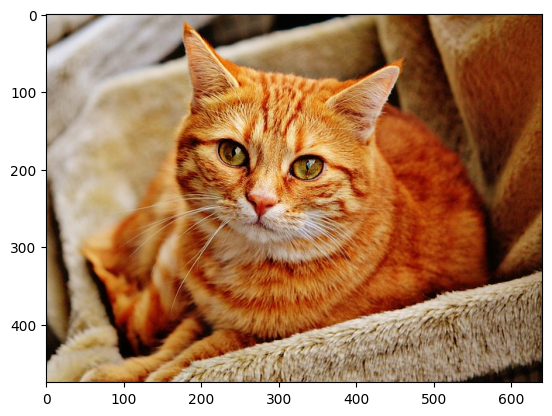

In [32]:
with nvimgcodec.Decoder() as decoder_2:
    nv_img = decoder_2.read(resources_dir + "cat-1046544_640.jp2")
    plt.imshow(nv_img.cpu())

Similarly for encoder resources 

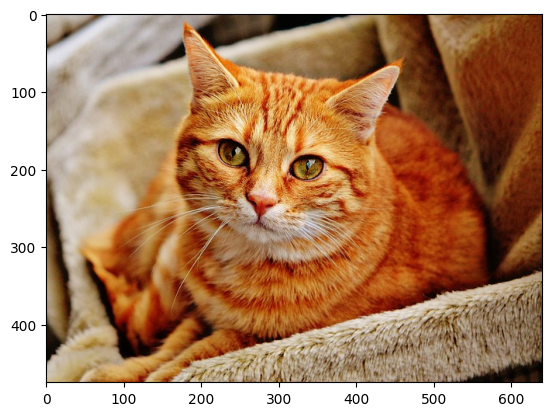

In [33]:
with nvimgcodec.Encoder() as encoder_2:
    encoder_2.write("cat-1046544_640_out.jpg", nv_img)
    image = cv2.imread("cat-1046544_640_out.jpg")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)

## Parsing image information without decoding
nvImageCodec allows to parse image information without having to decode the image. For this, we use the `CodeStream` entity

In [34]:
stream = nvimgcodec.CodeStream(resources_dir + "cat-1046544_640.jp2")
print(stream)

CodeStream(codec_name=jpeg2k height=475 width=640 channels=3 dtype=uint8 precision=8 num_tiles_y=1 num_tiles_x=1 tile_height=475 tile_width=640)


In [35]:
print(f"Image has dimensions {stream.height}x{stream.width}x{stream.channels} ({stream.height * stream.width * stream.channels} total number of pixels) structured in {stream.tile_height}x{stream.tile_width} tiles")

Image has dimensions 475x640x3 (912000 total number of pixels) structured in 475x640 tiles


An `CodeStream` object can be also created from an in-memory encoded stream (bytes or numpy array)

In [36]:
with open(resources_dir + "cat-1046544_640.jp2", 'rb') as in_file:
    data = in_file.read()
    stream = nvimgcodec.CodeStream(data)
    print(stream)

CodeStream(codec_name=jpeg2k height=475 width=640 channels=3 dtype=uint8 precision=8 num_tiles_y=1 num_tiles_x=1 tile_height=475 tile_width=640)
